<a href="https://colab.research.google.com/github/gnananawin/Basic-model-creation-and-comparision/blob/main/Milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING FILE AND PREPROCESSING:**

In [1]:
import pandas as pd
!gdown --fuzzy https://drive.google.com/file/d/1Ed2J_M6piMDaPew780mORke29Do5-YQ3/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1Ed2J_M6piMDaPew780mORke29Do5-YQ3
From (redirected): https://drive.google.com/uc?id=1Ed2J_M6piMDaPew780mORke29Do5-YQ3&confirm=t&uuid=937d7888-e497-408b-bb98-af004165c6a1
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 83.2MB/s]


In [3]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")
df.head()

<ipython-input-3-2e724c1aa863>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt',sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.isnull().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,True


In [6]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')
df.dropna(inplace=True)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


# **OBSERVATIONS:**
In this section we imported the file from the drive directory, and gone through with basic pre-processing steps like printing out first few rows of the dataset and after that we are checking if there any null values present in the dataset and we performed type conversion and normalization.

# **BUILDING REGRESSION MODELS:**

In [9]:
X = df.drop(columns=['Global_active_power'])
y = df['Global_active_power']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
linear_pred = linear_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
linear_r2 = r2_score(y_test, linear_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Linear Regression: RMSE = {linear_rmse}, R2 = {linear_r2}")
print(f"Lasso Regression: RMSE = {lasso_rmse}, R2 = {lasso_r2}")
print(f"Ridge Regression: RMSE = {ridge_rmse}, R2 = {ridge_r2}")

Linear Regression: RMSE = 0.04036849910904765, R2 = 0.9985500910441268
Lasso Regression: RMSE = 0.051774763389621496, R2 = 0.9976149813872359
Ridge Regression: RMSE = 0.040368498761181315, R2 = 0.9985500910691154


# **OBSERVATIONS:**
Linear Regression is a simple, widely used algorithm that models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a straight line to the data.

 Lasso Regression is a type of linear regression that includes a regularization term. It adds a penalty equal to the absolute value of the magnitude of coefficients, encouraging sparsity (some coefficients become zero).

 Ridge Regression is another type of linear regression with regularization, but unlike Lasso, it uses a penalty based on the square of the coefficients’ magnitudes.

*Linear Regression aims to minimize prediction error without regularization.

*Lasso Regression introduces sparsity, reducing complexity by setting some feature coefficients to zero.

*Ridge Regression also reduces complexity but keeps all features, shrinking the magnitude of coefficients.

Root Mean Squared Error:
It is a standard metric used to measure the accuracy of a predictive model. It represents the square root of the average of the squared differences between predicted values and actual (observed) values. Mathematically, RMSE is defined as:

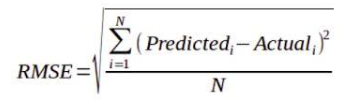



We trained and tested all these three models for our dataset and we aquired RSME values as follows:
Linear Regression: RMSE = 0.04036849910904765, R2 = 0.9985500910441268
Lasso Regression: RMSE = 0.051774763389621496, R2 = 0.9976149813872359
Ridge Regression: RMSE = 0.040368498761181315, R2 = 0.9985500910691154

# **MODEL COMPARISION:**

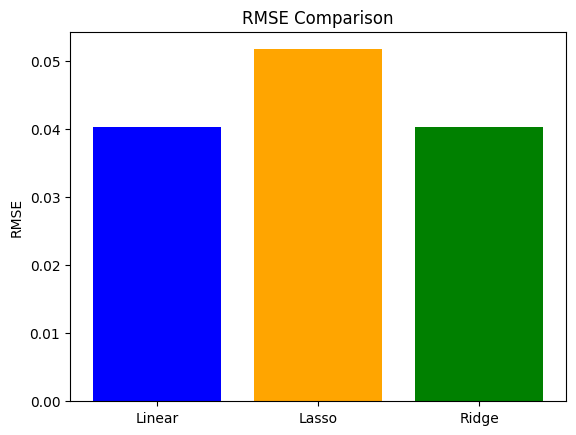

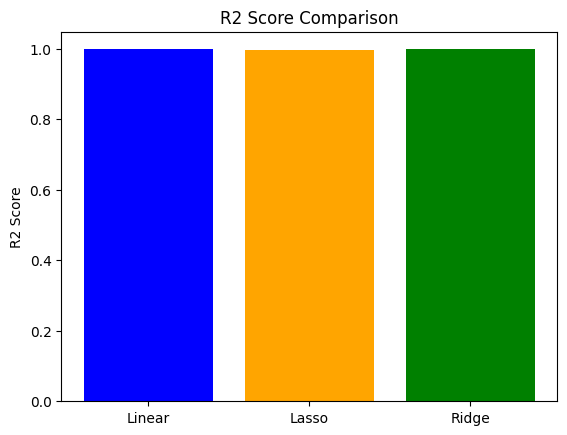

In [14]:
import matplotlib.pyplot as plt
models = ['Linear', 'Lasso', 'Ridge']
rmse_values = [linear_rmse, lasso_rmse, ridge_rmse]
plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.show()
r2_values = [linear_r2, lasso_r2, ridge_r2]
plt.bar(models, r2_values, color=['blue', 'orange', 'green'])
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.show()

In [15]:
print("Linear Regression Coefficients:")
print(linear_model.coef_)

print("Lasso Regression Coefficients:")
print(lasso_model.coef_)

print("Ridge Regression Coefficients:")
print(ridge_model.coef_)

Linear Regression Coefficients:
[-0.17578678  0.0044532   0.23803781 -0.00032879 -0.00044213  0.00217587]
Lasso Regression Coefficients:
[-0.          0.          0.22891896  0.          0.          0.00306176]
Ridge Regression Coefficients:
[-0.17578585  0.0044532   0.2380378  -0.00032879 -0.00044213  0.00217587]


# **OBSERVATIONS:**
The RMSE is rather low and the R² score rather high; linear regression thus fits the data really well. This might be a result of the relationships mainly being linear, so that the model mostly captures these correctly without being in a need for further regularization.

Lasso regression performs slightly worse compared to linear and ridge regression. Elevated RMSE manifests that it may have over-simplified the model by sending some coefficients to zero in reducing them, thus producing a slightly lower accuracy in prediction. However, such a model is useful when interpretability and feature selection are needed.

Ridge regression works almost exactly like linear regression, meaning that the data does not suffer from multicollinearity or high variance coefficients, which would require regularization in this case, and so, the regularization is minimal in ridge, yielding a close model to linear regression in terms of performance.

Linear and Ridge Regression are preferable for this dataset due to their lower RMSE and similar high R² scores.
Lasso Regression could be useful if we need to simplify the model by reducing features, although this comes at the cost of a slight decrease in accuracy.

# **ACCURACY COMPARISION:**

In [16]:
from sklearn.metrics import r2_score
linear_pred = linear_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
linear_r2 = r2_score(y_test, linear_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print("Linear Regression R² Score (Accuracy):", linear_r2)
print("Lasso Regression R² Score (Accuracy):", lasso_r2)
print("Ridge Regression R² Score (Accuracy):", ridge_r2)

Linear Regression R² Score (Accuracy): 0.9985500910441268
Lasso Regression R² Score (Accuracy): 0.9976149813872359
Ridge Regression R² Score (Accuracy): 0.9985500910691154


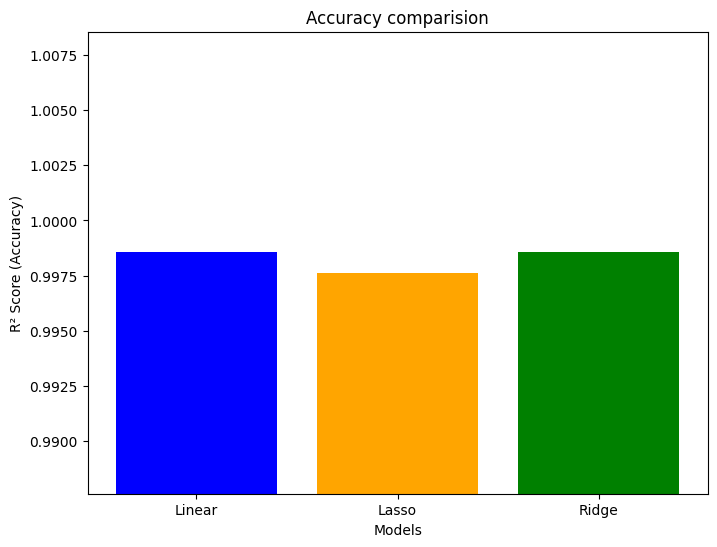

In [26]:
import matplotlib.pyplot as plt
linear_r2 = r2_score(y_test, linear_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
models = ['Linear', 'Lasso', 'Ridge']
r2_scores = [linear_r2, lasso_r2, ridge_r2]
min_r2 = min(r2_scores) - 0.01
max_r2 = max(r2_scores) + 0.01
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('R² Score (Accuracy)')
plt.title('Accuracy comparision')
plt.ylim(min_r2, max_r2)
plt.show()

# **OBSERVATIONS:**
Linear and Ridge Regression have nearly identical and high R² values of 0.9986. Lasso Regression's R² is a slightly lower amount of 0.9976, representing just a minor drop in accuracy.
The figure shows that R² values are almost the same; Lasso's is a little bit smaller since its feature reduction is used. Bars of the bar graph representing the accuracy nearly have the same length with small gaps.

For maximum accuracy, Linear and Ridge are preferable. Lasso is useful if model simplicity and feature selection are priorities, even with a slight drop in accuracy.


 * Why certain models have good accuracy and others don't?

In our plots, the Linear and Ridge Regression models capture the pattern in the data without greatly penalizing coefficients, so they show a very high accuracy. Ridge Regression introduces a regularization term that would prevent overfitting but retains many features, so the performance of Ridge Regression is almost indistinguishable from that of Linear Regression. Lasso Regression applies an even stronger regularization term by shrinking some of the coefficients toward zero, so its accuracy is slightly reduced. The selection of features may sometimes miss on the critical predictors, hence regarding the weak increase in its R² score.

Generally speaking, model accuracy works on a trade-off basis between the complexity and generality. Linear Regression works great only when the interrelated variables are purely linear. Ridge allows improving the accuracy by handling overfitting, particularly in cases with collinear predictors. Lasso reduces the model by removing the features that are less significant, which may sometimes result in decreased accuracy when the main predictors are penalized. It would depend on the dataset and may choose the best model based on the balance that needs to be maintained between the accuracy and the simplicity.